In [2]:
%config IPCompleter.greedy=True
import pandas as pd
import sklearn.cluster
import sklearn.metrics
import matplotlib.pyplot as plot
import numpy as np
import scipy
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [3]:
os.chdir(os.getcwd()+"/cv4")

In [4]:
df = pd.read_csv("happiness_report_2017.csv")

In [5]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
df.shape

(155, 12)

In [7]:
dfn = df.drop(["Happiness.Rank","Country"],axis=1)

In [8]:
dfn.head()

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [9]:
dff=dfn.drop(["Happiness.Score","Whisker.high","Whisker.low"],axis=1)

In [10]:
dff.head()
dff.shape

(155, 7)

In [11]:
countryList=df["Country"].tolist()

In [12]:
clusters = sklearn.cluster.KMeans(n_clusters=5).fit(dff)

In [28]:
clustResults = []
for n in range(2,10):
    clust = sklearn.cluster.KMeans(n_clusters=n).fit(dff)
    clustResults.append({ 'n': n, 'sse': clust.inertia_, 'silh': sklearn.metrics.silhouette_score(dff,clust.labels_) })
    

In [36]:
table = pd.DataFrame.from_dict(clustResults,orient='columns')
table=table.set_index('n')
table

,silh,sse
n,,
2,0.450439,154.739564
3,0.475697,105.578275
4,0.534273,64.180236
5,0.604560,33.634523
6,0.515022,30.830186
7,0.422633,28.054298
8,0.407104,25.910013
9,0.307622,24.529694


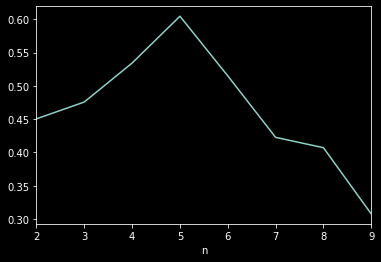

In [37]:
table.silh.plot()

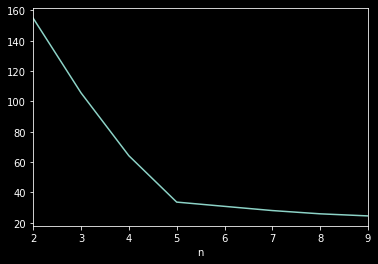

In [39]:
table.sse.plot()

In [15]:
clusteringResult = [x for x in zip(countryList,clusters.labels_)]

In [17]:
dff["Cluster"]=clusters.labels_

In [18]:
dffMean = dff.groupby(["Cluster"]).mean()

In [19]:
dffMean

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Cluster,,,,,,,
0,1.420687,1.440595,0.756945,0.514379,0.298984,0.192722,2.117846
1,0.452018,0.911087,0.262496,0.317451,0.239832,0.090920,1.810870
2,1.156353,1.238724,0.644185,0.393706,0.207231,0.108125,1.630676
3,0.894948,1.179153,0.531343,0.433214,0.196696,0.096284,2.650380
4,0.856524,1.159971,0.522209,0.422211,0.373759,0.136338,0.816244


In [20]:
tmp = pd.DataFrame.from_dict([{'country':'Finland', 'clusters': 1}, {'country':'Norway', 'clusters': 2}])

In [21]:
mapSource = pd.DataFrame(clusteringResult)

In [22]:
data = dict(type = 'choropleth', 
           locations = mapSource[0],
           locationmode = 'country names',
           z = mapSource[1], 
           text = mapSource[0],
           colorbar = {'title':'Cluster'})

In [23]:
layout = dict(title = 'Happiness Index 2017 clustering', 
             geo = dict(showframe = False, 
             projection = {'type': 'robinson'}))

In [24]:
choromap3 = go.Figure(data = [data], layout=layout)

In [25]:
iplot(choromap3)